#Import Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


# Load the dataset

In [ ]:
data = pd.read_csv('/content/TWR_Dataset - star_classification.csv')
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237688e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783893e+18,0.576661,5137.009660,55588.647500,449.312740
std,2.311265e+14,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324026e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237669e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.240000e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


#Data Preprocessing

In [ ]:
data.fillna(method='ffill', inplace=True)  # Handle missing values

features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID',
            'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID']
target = 'class'

X = data[features]
y = data[target]

<ipython-input-5-807972df1b75>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Handle missing values


#Scale features for KNN and SVM

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#Model Training and Evaluation

In [ ]:
results = {}

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
results['KNN'] = accuracy_score(y_test, knn_pred)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
results['Logistic Regression'] = accuracy_score(y_test, log_pred)

# Support Vector Machine
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
results['SVM'] = accuracy_score(y_test, svm_pred)

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, dtree_pred)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
results['Naive Bayes'] = accuracy_score(y_test, nb_pred)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
results['Random Forest'] = accuracy_score(y_test, rf_pred)

#Function to visualize confusion matrix

In [ ]:


# Function to visualize confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Galaxy', 'Star', 'QSO'],
                yticklabels=['Galaxy', 'Star', 'QSO'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Model Training and Evaluation

models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


#Classification Report and Confusion Matrix

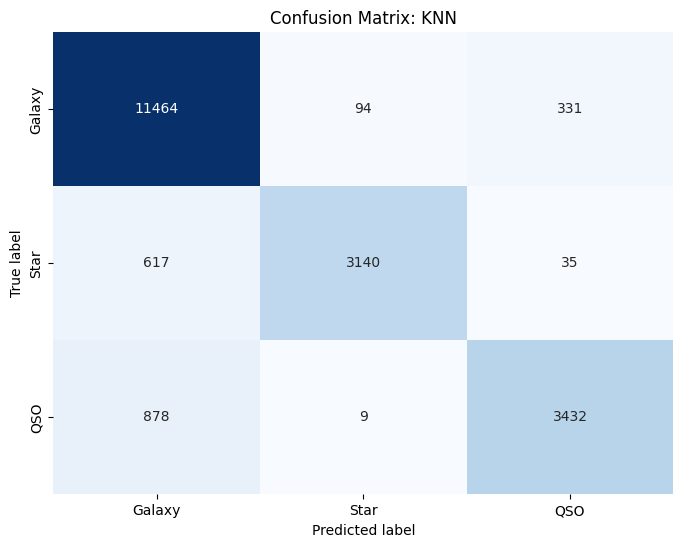

Classification Report for KNN:

              precision    recall  f1-score   support

      GALAXY       0.88      0.96      0.92     11889
         QSO       0.97      0.83      0.89      3792
        STAR       0.90      0.79      0.85      4319

    accuracy                           0.90     20000
   macro avg       0.92      0.86      0.89     20000
weighted avg       0.90      0.90      0.90     20000



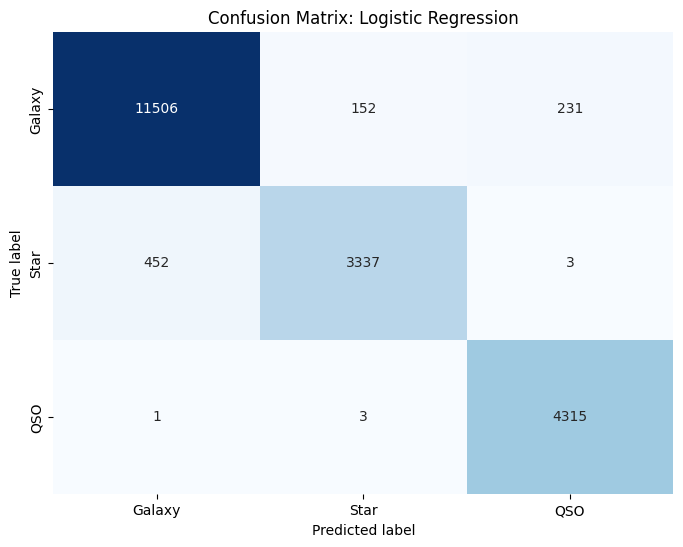

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.96     11889
         QSO       0.96      0.88      0.92      3792
        STAR       0.95      1.00      0.97      4319

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000



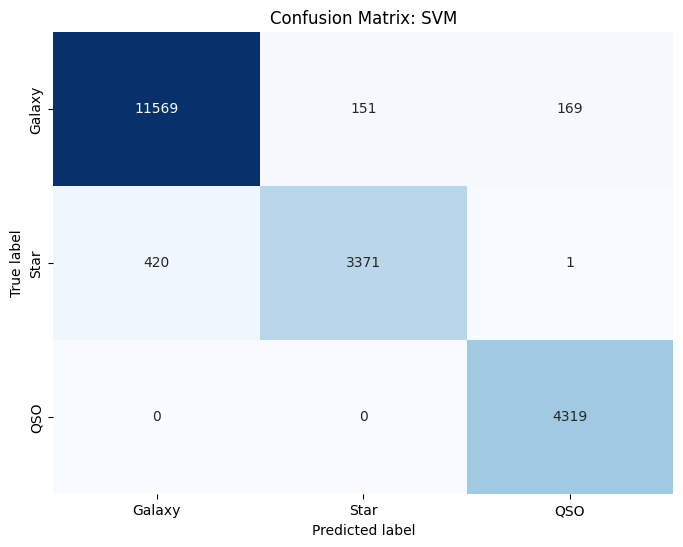

Classification Report for SVM:

              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.97     11889
         QSO       0.96      0.89      0.92      3792
        STAR       0.96      1.00      0.98      4319

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.96     20000
weighted avg       0.96      0.96      0.96     20000



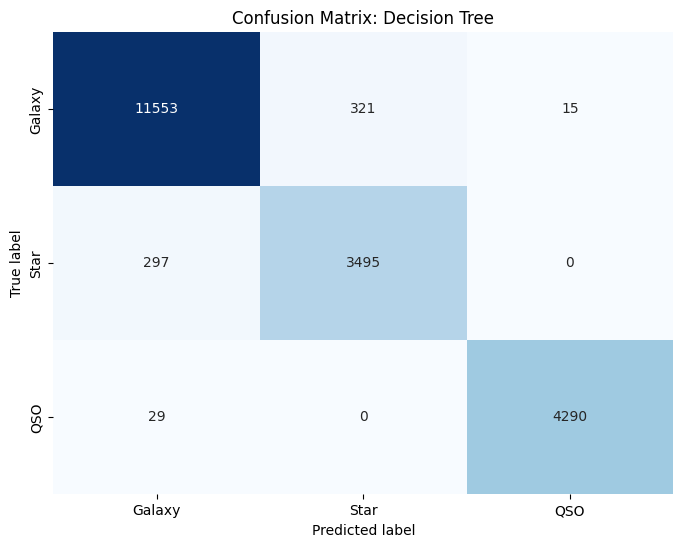

Classification Report for Decision Tree:

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11889
         QSO       0.92      0.92      0.92      3792
        STAR       1.00      0.99      0.99      4319

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000



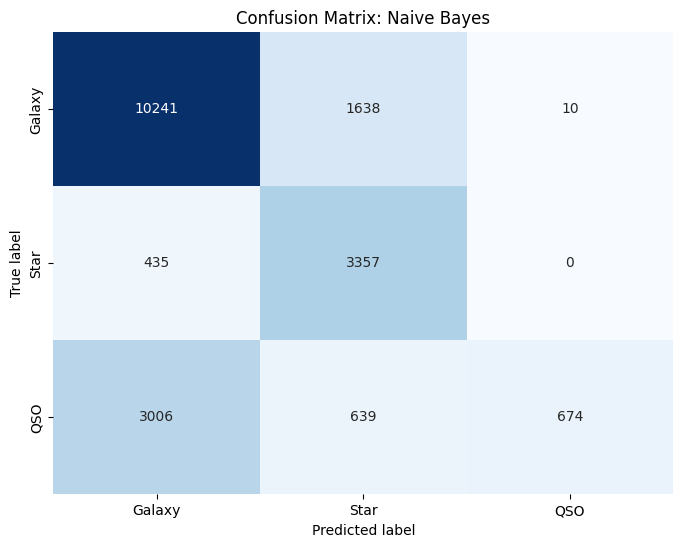

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

      GALAXY       0.75      0.86      0.80     11889
         QSO       0.60      0.89      0.71      3792
        STAR       0.99      0.16      0.27      4319

    accuracy                           0.71     20000
   macro avg       0.78      0.63      0.59     20000
weighted avg       0.77      0.71      0.67     20000



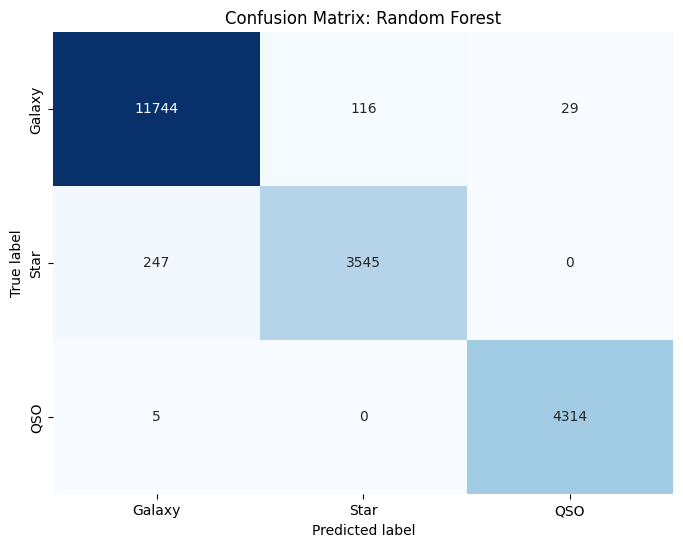

Classification Report for Random Forest:

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
         QSO       0.97      0.93      0.95      3792
        STAR       0.99      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



In [ ]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Iterate through models, fit, predict and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, model_name)

    # Classification Report
    print(f'Classification Report for {model_name}:\n')
    print(classification_report(y_test, y_pred))

#Comparison of Models

In [ ]:
for model, score in results.items():
    print(f'{model} Accuracy: {score:.4f}')

KNN Accuracy: 0.9018
Logistic Regression Accuracy: 0.9579
SVM Accuracy: 0.9629
Decision Tree Accuracy: 0.9669
Naive Bayes Accuracy: 0.7136
Random Forest Accuracy: 0.9801


#Visualizing the comparison

<ipython-input-12-cd60faef65a4>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(results.keys()), y=list(results.values()), palette=colors)


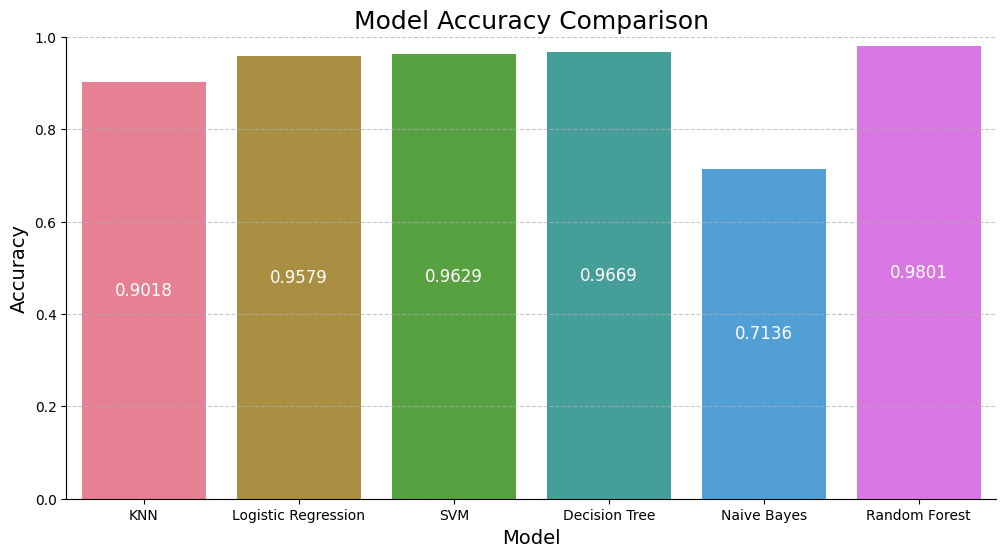

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy results
results = {
    'KNN': 0.9018,
    'Logistic Regression': 0.9579,
    'SVM': 0.9629,
    'Decision Tree': 0.9669,
    'Naive Bayes': 0.7136,
    'Random Forest': 0.9801
}

plt.figure(figsize=(12, 6))

# Create a color palette
colors = sns.color_palette('husl', len(results))

# Create the bar plot with different colors
bar_plot = sns.barplot(x=list(results.keys()), y=list(results.values()), palette=colors)

# Add title and labels
plt.title('Model Accuracy Comparison', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0, 1)

# Annotate the bars with accuracy values inside the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.4f}',
                      (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Centered inside the bar
                      ha='center', va='center',
                      fontsize=12, color='white',  # White color for better visibility
                      rotation=0)

# Improve aesthetics
sns.despine()  # Remove the top and right spines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability

plt.show()
